In this task the optimal number of clusters is predicted. K-Means algorithm is used as the clustering algorithm.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import metrics

**Pre-Processing**

The dataset is loaded and the missing values will be checked. Following that, the dataset is split into training and test set.  

In [ ]:
iris_data = pd.read_csv('Iris.csv')
X = iris_data.iloc[:,1:5]
Y = iris_data.iloc[:,5]

In [ ]:
X.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

No missing values are found. 


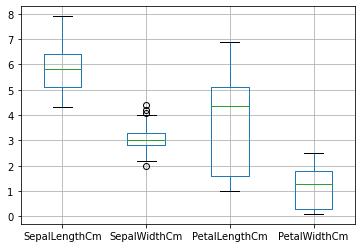

In [ ]:
X.boxplot()
plt.show()

We can see that the dataset is negatively skewed and sepal width has some outliers. As there exists a group within the outliers, these outliers are not removed. They are kept for further analysis.
Now let us proceed further for dataset split

In [ ]:
x_train,x_test, y_train ,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

**Choosing the optimal number of clusters.**

**Internal Validation**

Various methods are available to choose the optimal number of clusters. Here, Calinski-Harabasz index is used as the metric to choose the optimal number of clusters. The cluster with maximum CH index is choosen as the optimal number of cluster

In this scenario, we have found CH index for clusters upto 5. By default, CH index for cluster = 1 is 1. 

In [ ]:
K=5
CH = [1]*(K+1)

for cluster in range(2,K+1):
  model = KMeans(n_clusters=cluster).fit(x_train) 
  labels = model.labels_
  CH[cluster] = metrics.calinski_harabasz_score(x_train, labels)



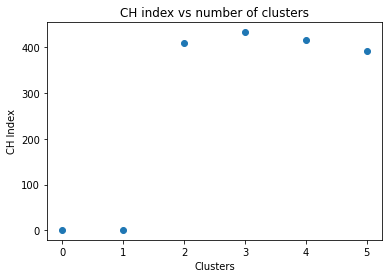

In [ ]:
plt.scatter(list(range(K+1)) ,CH)
plt.xlabel("Clusters")
plt.ylabel("CH Index")
plt.title("CH index vs number of clusters")
plt.show()

**We can see that the maximum CH index is cluster = 3.** Hence we conclude that the optimal number of cluster is 3. We fit the model with clusters = 3


In [ ]:
final_fit = KMeans(n_clusters=3).fit(x_train)

In [ ]:
class_labels = final_fit.predict(x_train)

**Visualizing the output**

The model is fitted with clusters = 3. As the dataset is 4-dimension, for visualization purpose, we reduce the dimension to 2.



In [ ]:
reduced_x = TSNE(n_components=2).fit_transform(x_train)

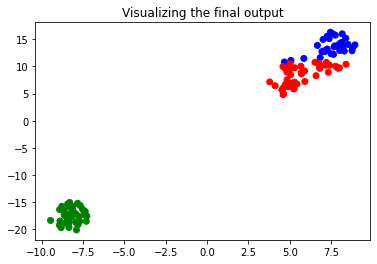

In [ ]:
colors = np.array(['Green','Red','Blue'])
plt.scatter(reduced_x[:,0],reduced_x[:,1],c=colors[class_labels])
plt.title("Visualizing the final output")
plt.show()

**External Validation**

As the number of cluster is concluded to 3, the performance of the model is evaluated using adjusted rand index metric. 

Also the confusion matrix is provided below


In [ ]:
test_pred = final_fit.predict(x_test)

In [ ]:
print(adjusted_rand_score(test_pred,y_test))

0.8182451253481894


**The adjusted rand index is found to be 0.818.** This is close to 1. The fitted model is good.

The confusion matrix is provided below and let us check at the matrix


In [ ]:
## converting the text into numbers for creating the confusion matrix
conv_y_test = []
## encoded alphabetically
for i in y_test:
  if i == "Iris-versicolor":
    conv_y_test.append(1)
  elif i =="Iris-virginica":
    conv_y_test.append(2)
  elif i=="Iris-setosa":
    conv_y_test.append(0)

In [ ]:
confusion_matrix(conv_y_test,test_pred)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  5]])

We can see that 28 out of 30 samples are predicted perfectly. The accuracy is high. The fitted model is really good.